# Descrição do Projeto

# Configuração de Ambiente

In [1]:
# Instalação do pacote MySQL do Python

!pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Importação do conector do MySQL

import mysql.connector

In [3]:
# Conexão com MySQL

conn = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "S@kura22",
    database = "polimero"
)


# Função para executar consultas SQL
def execute_query(query):
    cursor = conn.cursor()
    cursor.execute(query)
    result = cursor.fetchall()
    cursor.close()
    return result

# Início das Análises

## Exploração dos Dados

In [4]:
# Bibliotecas
# ===========

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import calendar

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# Exemplo: Consulta para recuperar dados da tabela Cliente

query_cliente = "SELECT * FROM Cliente;"
cliente_data = execute_query(query_cliente)

for row in cliente_data:
    print(row)

(1, 'Desenvolvimento de Engenharia Industrial Ltda', '98.765.432/0001-98', '987654321', '12345678', '(84) 99876-5432', 4789, 4789, 6, 115567, 115567)
(2, 'Desenvolvimento de Equipamentos Industriais Ltda', '32.109.876/0001-61', '321098765', '76543210', '(13) 65432-1098', 4961, 4961, 6, 253427, 253427)
(3, 'Desenvolvimento de Materiais Avancados Ltda', '34.567.890/0001-40', '345678901', '98765432', '(64) 76543-2109', 4667, 4667, 5, 199382, 199382)
(4, 'Desenvolvimento de Polimeros de Alta Performance Ltda', '43.210.987/0001-50', '432109876', '9876543', '(64) 21098-7654', 2856, 2856, 6, 152786, 152786)
(5, 'Desenvolvimento de Polimeros Especiais em Engenharia Ltda', '43.210.987/0001-09', '432109876', '9876543', '(64) 21098-7654', 2856, 1256, 6, 152786, 152780)
(6, 'Desenvolvimento de Solucoes em Polimeros Ltda', '89.123.456/0001-96', '891234567', '54321098', '(24) 65432-1098', 476, 476, 3, 25315, 25315)
(7, 'Desenvolvimento de Solucoes Industriais Ltda', '12.345.678/0001-16', '123456789'

In [6]:
execute_query('show tables')

[('cliente',),
 ('endereco',),
 ('familia',),
 ('grupo',),
 ('info_gerais',),
 ('linha',),
 ('log',),
 ('municipio',),
 ('ofr_sep_exp',),
 ('operacao',),
 ('order_fill_rate',),
 ('otd',),
 ('otif',),
 ('pedidovenda',),
 ('pedidovendaitem',),
 ('produto',),
 ('tempo_ciclo_pedido',),
 ('tempo_entrega',),
 ('ticket_medio_pedido',),
 ('transportadora',),
 ('uf',),
 ('uso',)]

In [7]:
execute_query('describe cliente')

[('Cliente_numero', 'int', 'NO', 'PRI', None, ''),
 ('Cliente', 'varchar(80)', 'NO', '', None, ''),
 ('CNPJ', 'varchar(20)', 'YES', 'UNI', None, ''),
 ('IE', 'varchar(25)', 'YES', '', None, ''),
 ('IM', 'varchar(14)', 'YES', '', None, ''),
 ('Telefones', 'varchar(60)', 'YES', '', None, ''),
 ('Numero_compra', 'int', 'NO', '', None, ''),
 ('Numero_entrega', 'int', 'NO', '', None, ''),
 ('Grupo_numero', 'int', 'NO', 'PRI', None, ''),
 ('Cod_log_compra', 'int', 'NO', 'PRI', None, ''),
 ('Cod_log_entrega', 'int', 'NO', 'PRI', None, '')]

In [68]:
# DataFrame da tabela
# ===================

geral_data = execute_query('SELECT * FROM info_gerais;')

df = pd.DataFrame(geral_data, columns=['Numero Produto','Cliente','Produto','Operacao','Uso','Familia','Linha','Ordem Venda','Transportadora','Tipo Transporte','Grupo','Volume','Valor Mercadoria (R$)','Frete  (R$)','Seguro (R$)','Acrescimos (R$)','Peso Liquido (Kg)','Peso Bruto (Kg)','Emitido em','Previsao Entrega','Data Embarque','Data Entregue','On Time','In Full','On Time/In Full','Municipio','UF','Regiao'])


In [28]:
# Informações gerais do Dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4849 entries, 0 to 4848
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Numero Produto         4849 non-null   int64 
 1   Cliente                4849 non-null   object
 2   Produto                4849 non-null   object
 3   Operacao               4849 non-null   object
 4   Uso                    4849 non-null   object
 5   Familia                4849 non-null   object
 6   Linha                  4849 non-null   object
 7   Ordem Venda            4849 non-null   object
 8   Transportadora         4849 non-null   object
 9   Tipo Transporte        4849 non-null   object
 10  Grupo                  4849 non-null   object
 11  Volume                 4849 non-null   int64 
 12  Valor Mercadoria (R$)  4849 non-null   object
 13  Frete  (R$)            4849 non-null   object
 14  Seguro (R$)            4849 non-null   object
 15  Acrescimos (R$)      

In [69]:
# Convertendo colunas para tipo category

df['Numero Produto'] = df['Numero Produto'].astype('category')
df['Cliente'] = df['Cliente'].astype('category')
df['Produto'] = df['Produto'].astype('category')
df['Operacao'] = df['Operacao'].astype('category')
df['Uso'] = df['Uso'].astype('category')
df['Familia'] = df['Familia'].astype('category')
df['Linha'] = df['Linha'].astype('category')
df['Ordem Venda'] = df['Ordem Venda'].astype('category')
df['Transportadora'] = df['Transportadora'].astype('category')
df['Tipo Transporte'] = df['Tipo Transporte'].astype('category')
df['Grupo'] = df['Grupo'].astype('category')
df['Municipio'] = df['Municipio'].astype('category')
df['UF'] = df['UF'].astype('category')
df['Regiao'] = df['Regiao'].astype('category')

In [70]:
# Convertendo colunas para tipo float

df['Valor Mercadoria (R$)'] = df['Valor Mercadoria (R$)'].astype(float)
df['Frete  (R$)'] = df['Frete  (R$)'].astype(float)
df['Seguro (R$)'] = df['Seguro (R$)'].astype(float)
df['Acrescimos (R$)'] = df['Acrescimos (R$)'].astype(float)
df['Peso Liquido (Kg)'] = df['Peso Liquido (Kg)'].astype(float)
df['Peso Bruto (Kg)'] = df['Peso Bruto (Kg)'].astype(float)

In [71]:
# Convertendo colunas para tipo data

df['Emitido em'] = pd.to_datetime(df['Emitido em'])
df['Previsao Entrega'] = pd.to_datetime(df['Previsao Entrega'])
df['Data Embarque'] = pd.to_datetime(df['Data Embarque'])
df['Data Entregue'] = pd.to_datetime(df['Data Entregue'])

In [51]:
# Informações gerais do Dataframe após conversões

print(df.dtypes)

Numero Produto                 category
Cliente                        category
Produto                        category
Operacao                       category
Uso                            category
Familia                        category
Linha                          category
Ordem Venda                    category
Transportadora                 category
Tipo Transporte                category
Grupo                          category
Volume                            int64
Valor Mercadoria (R$)           float64
Frete  (R$)                     float64
Seguro (R$)                     float64
Acrescimos (R$)                 float64
Peso Liquido (Kg)               float64
Peso Bruto (Kg)                 float64
Emitido em               datetime64[ns]
Previsao Entrega         datetime64[ns]
Data Embarque            datetime64[ns]
Data Entregue            datetime64[ns]
On Time                           int64
In Full                           int64
On Time/In Full                   int64


In [34]:
# Primeiras linhas do DataFrame
print(df.head())

  Numero Produto                                        Cliente  \
0           1654  Desenvolvimento de Engenharia Industrial Ltda   
1           1702  Desenvolvimento de Engenharia Industrial Ltda   
2           1768  Desenvolvimento de Engenharia Industrial Ltda   
3           1785  Desenvolvimento de Engenharia Industrial Ltda   
4           2622  Desenvolvimento de Engenharia Industrial Ltda   

                               Produto   Operacao                     Uso  \
0                  CAIXA PLASTICA PL15    Remessa  Vasilhames ou Sacarias   
1  INSERTO METALICO X6H - RETRABALHADO    Remessa        Industrializacao   
2                     SUPORTE BIG BAGS  Devolucao  Vasilhames ou Sacarias   
3                  CAIXA PLASTICA PL15  Devolucao  Vasilhames ou Sacarias   
4           CAIXA PLASTICA KLT AMARELA  Devolucao  Vasilhames ou Sacarias   

         Familia       Linha                         Ordem Venda  \
0      Embalagem  Embalagens          Remessa Vasilhame Estadual  

In [35]:
# Estatísticas descritivas
print(df.describe())

              Volume  Valor Mercadoria (R$)   Frete  (R$)   Seguro (R$)  \
count    4849.000000           4.849000e+03   4849.000000   4849.000000   
mean      499.238812           1.155286e+04    231.057226     57.764727   
min         1.000000           0.000000e+00      0.000000      0.000000   
25%        11.000000           5.950000e+02     11.900000      2.980000   
50%        34.000000           1.898000e+03     37.960000      9.490000   
75%       118.000000           7.100000e+03    142.000000     35.500000   
max    112540.000000           2.422778e+06  48455.550000  12113.890000   
std      3336.553838           8.797358e+04   1759.471418    439.867943   

       Acrescimos (R$)  Peso Liquido (Kg)  Peso Bruto (Kg)  \
count           4849.0        4849.000000      4849.000000   
mean               0.0        2900.577925      2954.876820   
min                0.0           0.000000         0.000000   
25%                0.0          12.000000        18.000000   
50%           

## Visualização dos Dados

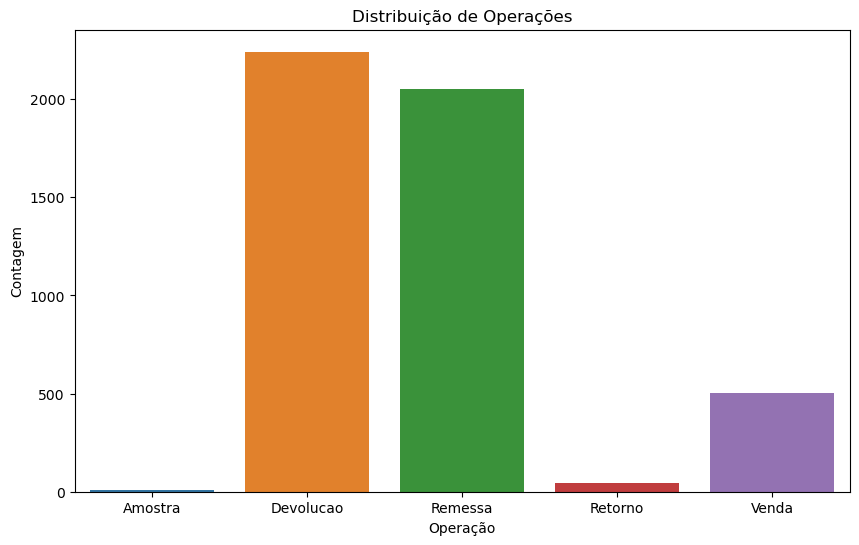

In [36]:
# Distribuição de Operações

plt.figure(figsize=(10, 6))
sns.countplot(x='Operacao', data=df)
plt.title('Distribuição de Operações')
plt.xlabel('Operação')
plt.ylabel('Contagem')
plt.show()

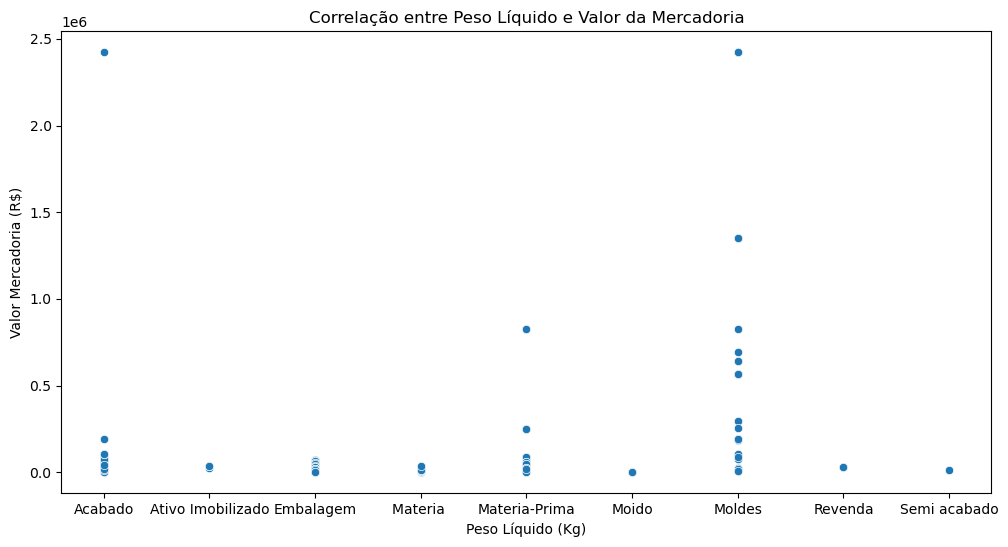

In [42]:
# Correlação entre Peso Líquido e Valor da Mercadoria

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Familia', y='Valor Mercadoria (R$)', data=df)
plt.title('Correlação entre Peso Líquido e Valor da Mercadoria')
plt.xlabel('Peso Líquido (Kg)')
plt.ylabel('Valor Mercadoria (R$)')
plt.show()

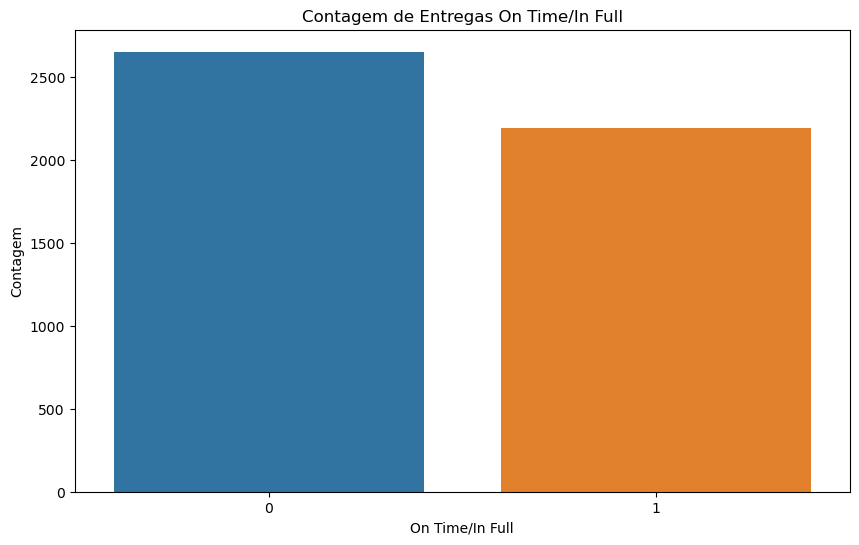

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='On Time/In Full', data=df)
plt.title('Contagem de Entregas On Time/In Full')
plt.xlabel('On Time/In Full')
plt.ylabel('Contagem')
plt.show()

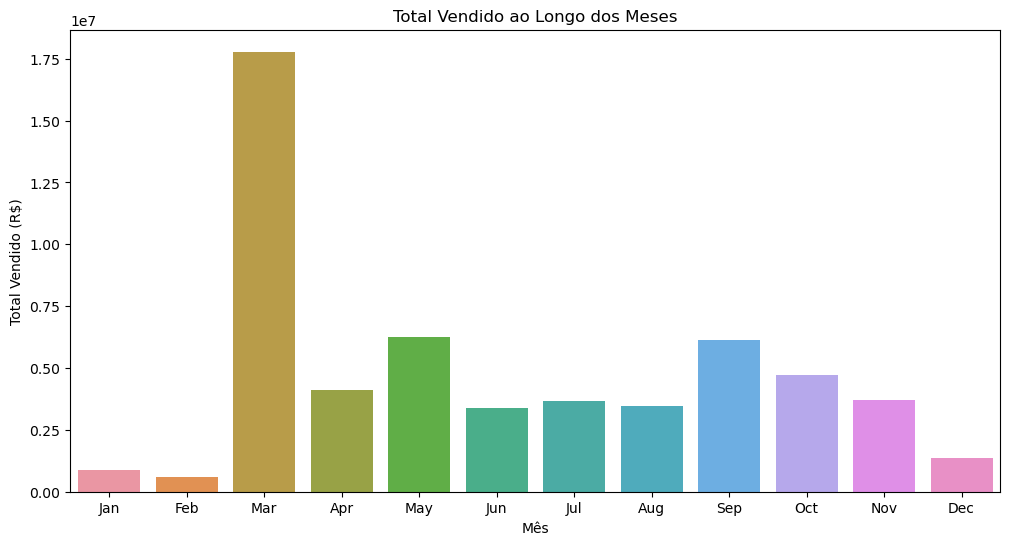

In [44]:
# Histograma para Total de Lucro por Mês

import calendar

df['Emitido em'] = pd.to_datetime(df['Emitido em'])

# Criando uma nova coluna 'Mes' para extrair o mês da data de emissão
df['Mes'] = df['Emitido em'].dt.month

# Mapeando os números dos meses para os nomes dos meses
df['Mes'] = df['Mes'].apply(lambda x: calendar.month_abbr[x])

# Agrupando por mês e calculando a soma do valor total vendido em cada mês
vendas_por_mes = df.groupby('Mes')['Valor Mercadoria (R$)'].sum().reset_index()

# Criando um histograma
plt.figure(figsize=(12, 6))
sns.barplot(x='Mes', y='Valor Mercadoria (R$)', data=vendas_por_mes, order=calendar.month_abbr[1:])
plt.title('Total Vendido ao Longo dos Meses')
plt.xlabel('Mês')
plt.ylabel('Total Vendido (R$)')
plt.show()


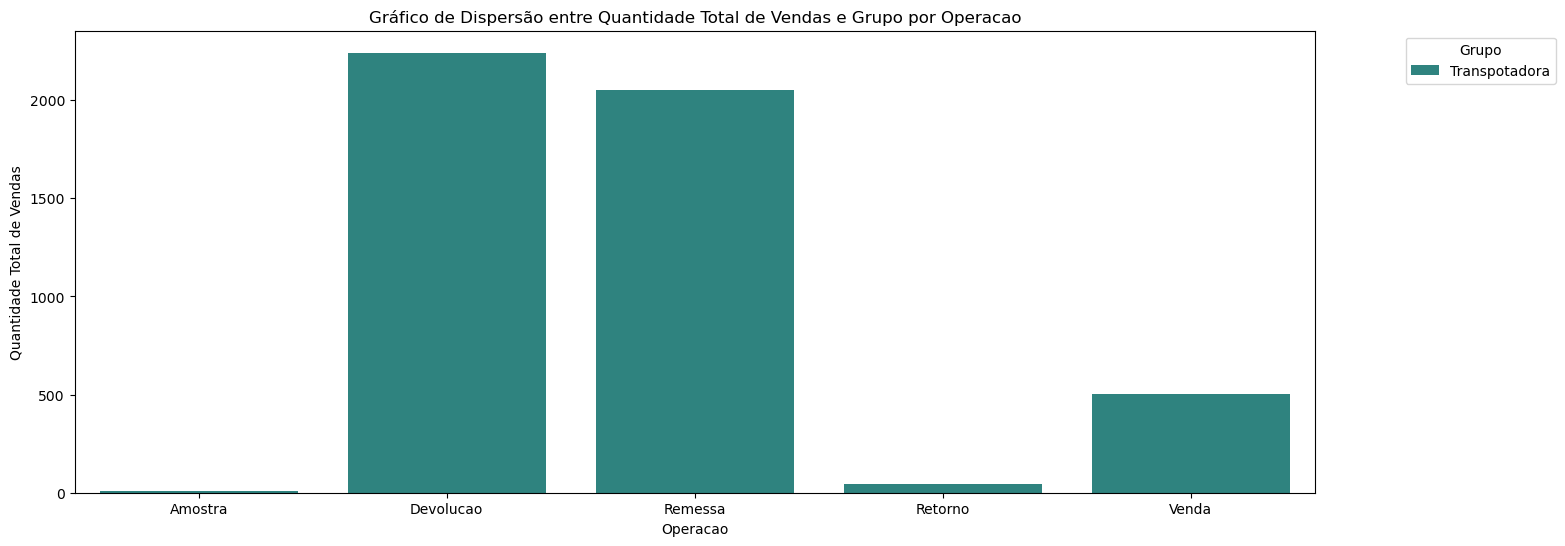

In [45]:
# Gráfico de dispersão

plt.figure(figsize=(16, 6))
sns.countplot(x='Operacao', hue='Grupo', data=df, palette='viridis')
plt.title('Gráfico de Dispersão entre Quantidade Total de Vendas e Grupo por Operacao')
plt.xlabel('Operacao')
plt.ylabel('Quantidade Total de Vendas')
plt.legend(title='Grupo', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

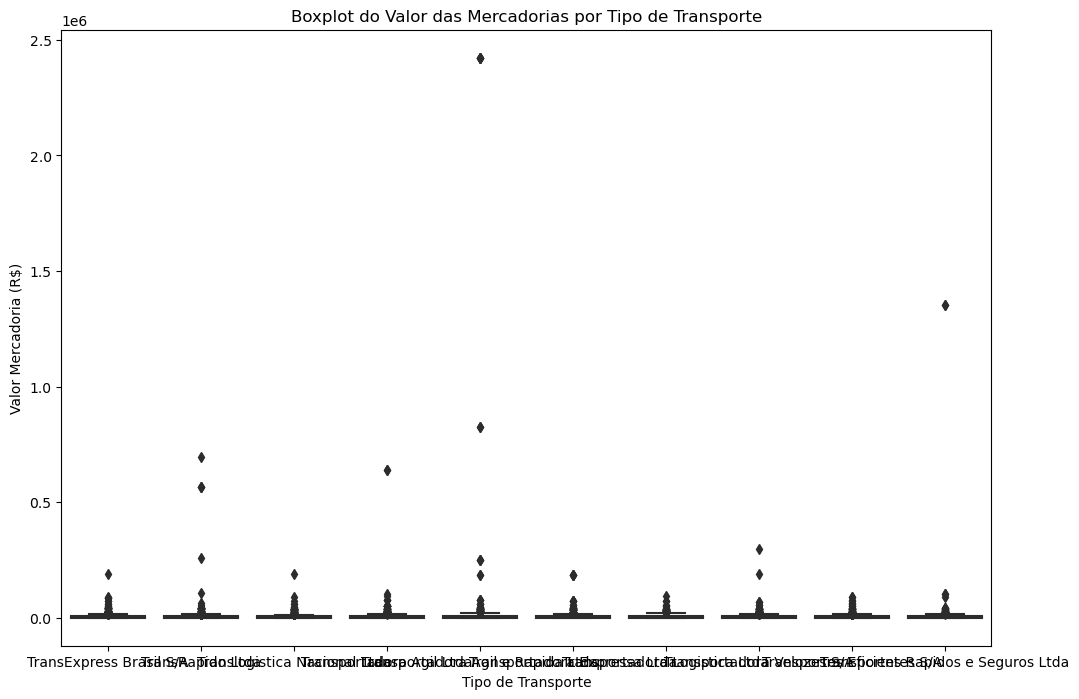

In [48]:
# Criando um boxplot para analisar a distribuição do valor das mercadorias por tipo de transporte

plt.figure(figsize=(12, 8))
sns.boxplot(x='Transportadora', y='Valor Mercadoria (R$)', data=df, palette='viridis')
plt.title('Boxplot do Valor das Mercadorias por Tipo de Transporte')
plt.xlabel('Tipo de Transporte')
plt.ylabel('Valor Mercadoria (R$)')
plt.show()

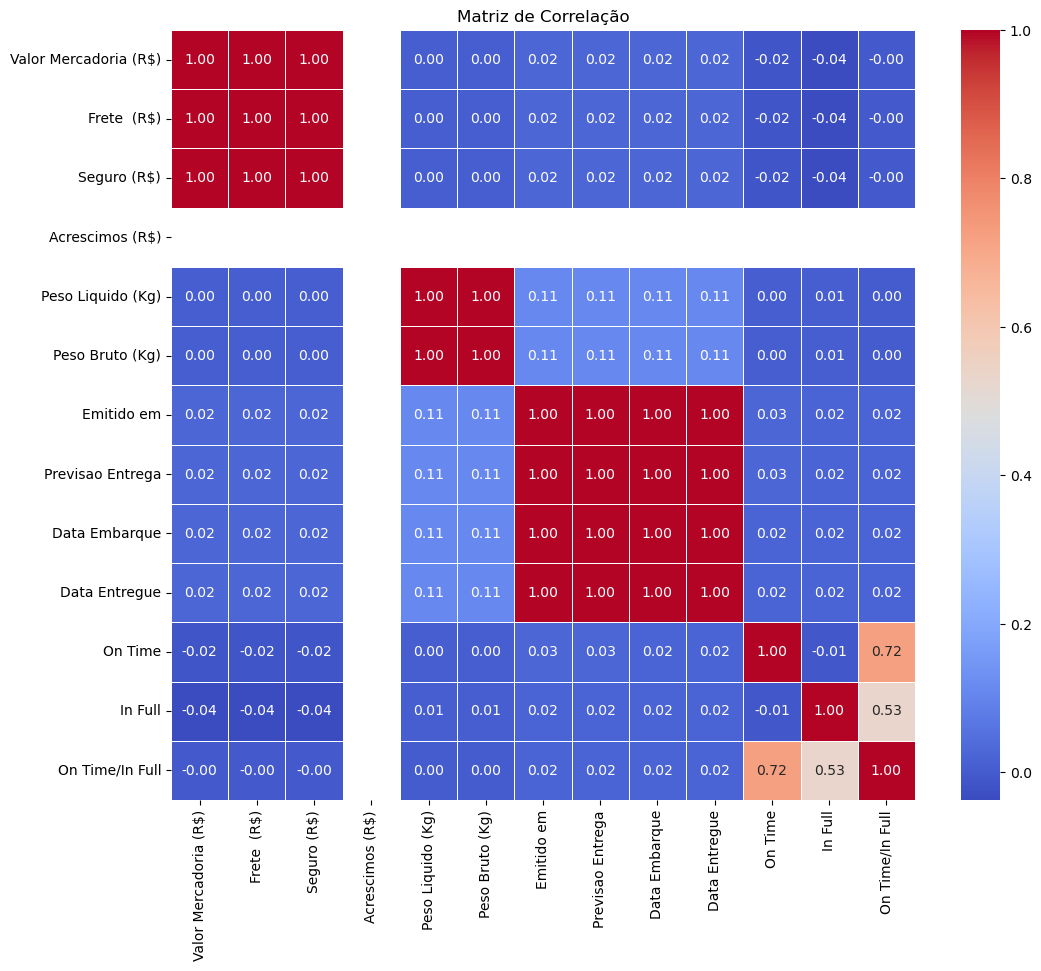

In [58]:
# Excluindo colunas de texto temporariamente para calcular a matriz de correlação
df_numerico = df.drop(['Numero Produto','Cliente','Produto','Operacao','Uso','Familia','Linha','Ordem Venda','Transportadora','Tipo Transporte','Grupo','Volume','Municipio','UF','Regiao','Mes'], axis=1)

# Calculando a matriz de correlação
correlation_matrix = df_numerico.corr()

# Criando um mapa de calor da matriz de correlação usando seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

## Predição de Dados

In [ ]:
# Dividir dados em treinamento e teste
X = cliente_df[['Idade', 'Renda', 'Pontuacao_credito', 'Numero_compra']]
y = cliente_df['Categoria_produto']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar modelo de classificação (Random Forest, neste caso)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
predictions = model.predict(X_test)

# Avaliar desempenho
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Imprimir relatório de classificação e matriz de confusão
print(classification_report(y_test, predictions))
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Mean Squared Error: 8.077935669463161e-28
R-squared: nan


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


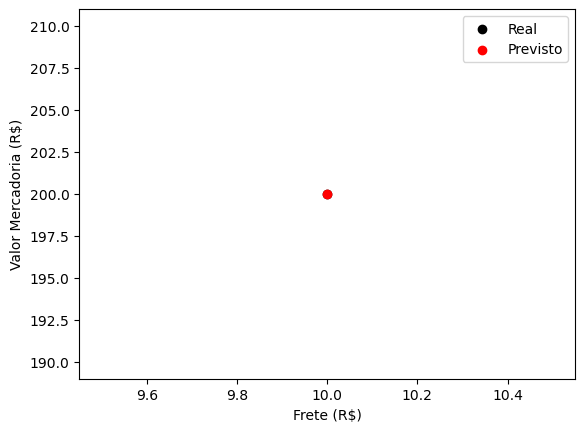

In [60]:
# Regressão Linear para prever o Valor Mercadoria

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = {'Valor Mercadoria (R$)': [100, 200, 300, 400, 500],
        'Frete  (R$)': [5, 10, 15, 20, 25],
        'Peso Liquido (Kg)': [1, 2, 3, 4, 5]}

df = pd.DataFrame(data)

# Dividir o conjunto de dados em treino e teste
X = df.drop('Valor Mercadoria (R$)', axis=1)
y = df['Valor Mercadoria (R$)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualizar as previsões vs. valores reais
plt.scatter(X_test['Frete  (R$)'], y_test, color='black', label='Real')
plt.scatter(X_test['Frete  (R$)'], y_pred, color='red', label='Previsto')
plt.xlabel('Frete (R$)')
plt.ylabel('Valor Mercadoria (R$)')
plt.legend()
plt.show()

In [63]:
# Árvore de Decisão

from sklearn.tree import DecisionTreeRegressor

# Criar e treinar o modelo de árvore de decisão
model_tree = DecisionTreeRegressor()
model_tree.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_tree = model_tree.predict(X_test)

# Avaliar o desempenho do modelo
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Mean Squared Error (Decision Tree): {mse_tree}')
print(f'R-squared (Decision Tree): {r2_tree}')

Mean Squared Error (Decision Tree): 10000.0
R-squared (Decision Tree): nan


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [65]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

# Criar e treinar o modelo de Random Forest
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_rf = model_rf.predict(X_test)

# Avaliar o desempenho do modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')


Mean Squared Error (Random Forest): 225.0
R-squared (Random Forest): nan


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Valor Mercadoria (R$)  5 non-null      int64
 1   Frete  (R$)            5 non-null      int64
 2   Peso Liquido (Kg)      5 non-null      int64
dtypes: int64(3)
memory usage: 252.0 bytes


In [73]:
df['Data Entregue']

0      2021-09-13
1      2021-09-23
2      2021-10-05
3      2021-10-10
4      2022-03-31
          ...    
4844   2023-08-02
4845   2023-09-23
4846   2023-10-17
4847   2023-11-25
4848   2023-11-25
Name: Data Entregue, Length: 4849, dtype: datetime64[ns]

Mean Squared Error (Tempo_total_entrega): 7.657370149056076


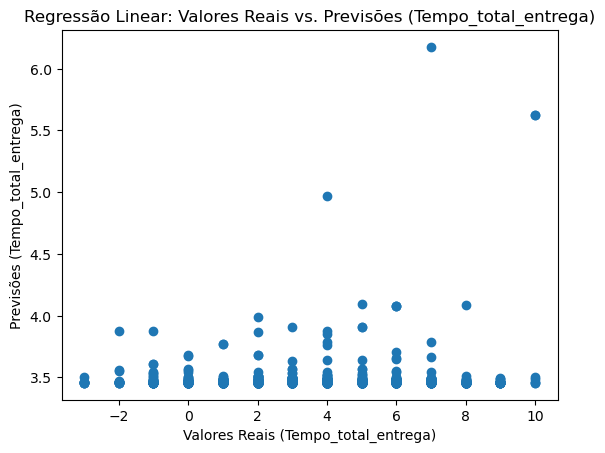

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Calcular a diferença entre as datas de entrega e embarque
df['Tempo_total_entrega'] = (df['Data Entregue'] - df['Emitido em']).dt.total_seconds() / (24 * 60 * 60)  # Converter para dias

# Separar os dados em variáveis de entrada (X) e variável de saída (y)
X = df[['Frete  (R$)', 'Peso Liquido (Kg)']]
y = df['Tempo_total_entrega']

# Dividir dados em treinamento e teste
X_train_tempo, X_test_tempo, y_train_tempo, y_test_tempo = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar modelo de regressão linear para o tempo total de entrega
model_tempo_total = LinearRegression()
model_tempo_total.fit(X_train_tempo, y_train_tempo)

# Fazer previsões nos dados de teste
predictions_tempo_total = model_tempo_total.predict(X_test_tempo)

# Avaliar desempenho
mse_tempo_total = mean_squared_error(y_test_tempo, predictions_tempo_total)
print(f'Mean Squared Error (Tempo_total_entrega): {mse_tempo_total}')

# Visualizar previsões vs. valores reais
plt.scatter(y_test_tempo, predictions_tempo_total)
plt.xlabel('Valores Reais (Tempo_total_entrega)')
plt.ylabel('Previsões (Tempo_total_entrega)')
plt.title('Regressão Linear: Valores Reais vs. Previsões (Tempo_total_entrega)')
plt.show()